In [12]:
# Importamos los módulos de sidermit

from sidermit.city import Graph, Demand
from sidermit.optimization import Optimizer
from sidermit.publictransportsystem import TransportMode
from sidermit.publictransportsystem import TransportNetwork
from sidermit.publictransportsystem import passenger

# Importamos los módulos de otras librerías

import pandas as pd
import numpy as np
import time

In [13]:
# build city
graph_obj = Graph.build_from_parameters(n=6, l=10, g=1.8, p=1)
passenger_obj =  passenger.Passenger(va=4, pv=2.74, pw=5.48, pa=0, pt=16, spv=2.74, spw=5.48, spa=0, spt=16)
bus_obj=  TransportMode(name='bus', bya=0, co=8.61 , c1=0.15, c2=0, v=20, t=2.5, fmax=150, kmax=160, theta=0.5, tat=0, d=1, fini=12)

In [14]:
# build a network without routes
network_obj = TransportNetwork(graph_obj)

circular_route = network_obj.get_circular_routes(mode_obj=bus_obj)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=3, short=True, express=False)
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
radial_route = network_obj.get_radial_routes(mode_obj=bus_obj, short=False, express=False)

# to add diametral and circular routes to transport network
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)
for route in feeder_route:
    network_obj.add_route(route)

In [15]:
# get all routes in network:obj
routes = network_obj.get_routes()
for route in routes:
    print(route.id)

DS3_bus_1
DS3_bus_2
DS3_bus_3
CIR_I_bus
CIR_R_bus
F_bus_1
F_bus_2
F_bus_3
F_bus_4
F_bus_5
F_bus_6


In [16]:
demand_obj = Demand.build_from_parameters(graph_obj, y=6000, a=0.2, alpha=0.3, beta=0.6) # Define demand
opt_obj = Optimizer.network_optimization(graph_obj, demand_obj, passenger_obj, network_obj, max_number_of_iteration=5, tolerance=0.1)

INFO:sidermit.optimization.optimizer:Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [17.05432994 17.05432994 17.05433547  7.80135281  7.85617809  6.19340036
  6.19340043  6.19343691  6.19340344  6.19340984  6.19340984]
	Constrain violation: 0.0
	VRC: 16504.858557104817
INFO:sidermit.optimization.optimizer:f_norm_distance: 58.345003626708646
INFO:sidermit.optimization.optimizer:Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [17.05432994 17.05432994 17.05433547  7.80135281  7.85617809  6.19340036
  6.19340043  6.19343691  6.19340344  6.19340984  6.19340984]
	Constrain violation: 0.0
	VRC: 16504.858557104817
INFO:sidermit.optimization.optimizer:f_norm_distance: 0.0
INFO:sidermit.optimization.optimizer:

Optimization Results
Success: True
Status: 1
Message: `gtol` termination condition is satisfied.
Max constrain violation: 0.0
VRC: 16504.858557104817

Frequency infor

In [17]:
print('VRC con lineas diametrales y circular 8896.118496414207, 3 zonas')
print('VRC con lineas feeder y circular 8900.592822122, 3 zonas')
print('VRC con lineas feeder 8449.955, 3 zonas')

print('VRC con lineas feeder y circular 11073.3949 , 4 zonas')
print('VRC con lineas diametrales y circular 11679.06826 , 4 zonas')

print('VRC con lineas diametrales y circular 17354.2475 , 6 zonas')
print('VRC con lineas feeder y circular 16504.8585 , 6 zonas')

VRC con lineas diametrales y circular 8896.118496414207, 3 zonas
VRC con lineas feeder y circular 8900.592822122, 3 zonas
VRC con lineas feeder 8449.955, 3 zonas
VRC con lineas feeder y circular 11073.3949 , 4 zonas
VRC con lineas diametrales y circular 11679.06826 , 4 zonas
VRC con lineas diametrales y circular 17354.2475 , 6 zonas


# Visualizar EDL

In [1]:
from AlgoritmoGenetico.Poblacion.individuo import Individuo
from AlgoritmoGenetico.BaseDatos.BD import BD
from sidermit.publictransportsystem import TransportMode, passenger
from AlgoritmoGenetico.Operadores.evaluador import Evaluador

In [2]:
n_zonas = 6
bd = BD(n_zonas)

In [3]:
tmode=  TransportMode(name='bus', bya=0, co=8.61 , c1=0.15, c2=0, v=20, t=2.5, fmax=150, kmax=160, theta=0.5, tat=0, d=1, fini=5)
pasajero=  passenger.Passenger(va=4, pv=2.74, pw=5.48, pa=0, pt=16, spv=2.74, spw=5.48, spa=0, spt=16)

In [4]:
def graficar(edl, prefijo):
    ind = Individuo(edl)
    ind.build_network(6, L=10, g=1.8, P=1, custom_tmode=tmode, bd=bd)
    for route in ind.network_sidermit.get_routes():
        ind.network_sidermit.plot(f'registros_spam/Imagenes/sidermit{n_zonas}zonasLinea{route.id}{prefijo}.png', list_routes=[route.id])

In [5]:
def calcular_frecuencias(edl, evaluador):
    ind = Individuo(edl)
    ind.build_network(6, L=10, g=1.8, P=1, custom_tmode=tmode, bd=bd)
    evaluador.evaluar_individuo(ind, bd)
    return ind.get_freq()

## id 04

In [13]:
# Parámetros del evaluador
L, g, P = 10, 1.8, 1
Y, a, alpha, beta = 750, 0.8, 0.6, 0.2
evaluador = Evaluador(passenger_obj=pasajero, custom_tmode=tmode, L=L, g=g, P=P, Y=Y, a=a, alpha=alpha, beta=beta,
                      n_zonas=n_zonas)

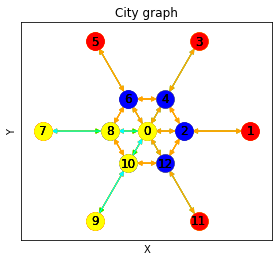

In [25]:
g1 = [2034, 1556, 1882]
graficar(g1, 'id04o')

In [18]:
calcular_frecuencias(g1, evaluador)

{2034: 4.182997015959973, 1556: 4.182998297821413, 1882: 4.182998693596403}

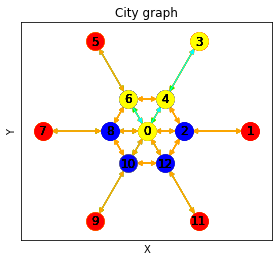

In [19]:
g4 = [3587, 1279, 263, 596, 1087, 511]
graficar(g4, 'id04uold')

In [20]:
calcular_frecuencias(g4, evaluador)

{3587: 1.89647724367145,
 1279: 2.130978443990633,
 263: 4.253398327436876,
 596: 3.331414468653768,
 1087: 4.060543204551585,
 511: 2.023841680649923}

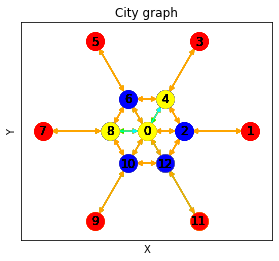

In [21]:
g5 = [263, 298, 333, 368, 17, 403, 438, 217]
graficar(g5, 'id04unew')

In [22]:
calcular_frecuencias(g5, evaluador)

{263: 4.253947964462429,
 298: 4.066467109120312,
 333: 4.086195415597141,
 368: 4.059679588241388,
 17: 0.4906684960393763,
 403: 4.250866627197706,
 438: 4.254626364889475,
 217: 0.5555107104540745}

## Id 5

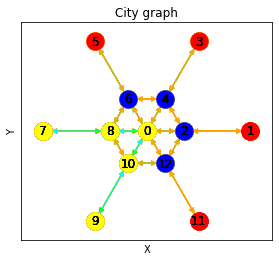

In [23]:
g5 = [2691, 5573, 1836, 7286, 1882]
graficar(g5, 'id05o')

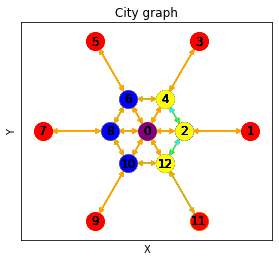

In [24]:
g5 =[263, 298, 333, 368, 403, 438, 5561, 222]
graficar(g5, 'id05u')

## Id 7

In [14]:
# Parámetros del evaluador
L, g, P = 10, 1.8, 1
Y, a, alpha, beta = 15000, 0.8, 0.5, 0.25
evaluador = Evaluador(passenger_obj=pasajero, custom_tmode=tmode, L=L, g=g, P=P, Y=Y, a=a, alpha=alpha, beta=beta,
                      n_zonas=n_zonas)

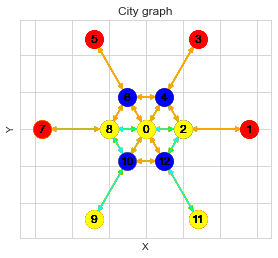

In [12]:
edl7_o = [7042, 487, 2027, 6220, 1708, 4301, 1882, 1694]
graficar(edl7_o, 'id07o')

In [17]:
calcular_frecuencias(edl7_o, evaluador)

{7042: 9.642646438652067,
 487: 17.879860810212687,
 2027: 12.270773758477706,
 6220: 11.650334251425347,
 1708: 4.385443712256376,
 4301: 5.104291133610379,
 1882: 19.976076878980898,
 1694: 5.803782023289517}

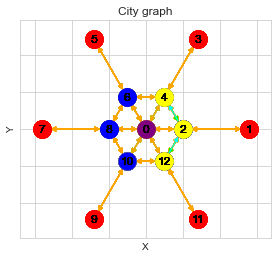

In [18]:
edl7_u = [324, 263, 43, 77, 45, 368, 17, 403, 2387, 53, 819, 26, 219, 28, 222]
graficar(edl7_u, 'id07u')

In [19]:
calcular_frecuencias(edl7_u, evaluador)

{324: 18.15389433980832,
 263: 24.786261414031088,
 43: 14.613972391524431,
 77: 25.51557762326094,
 45: 13.085414328393085,
 368: 22.14791813966028,
 17: 4.222622284129311,
 403: 24.731561533910863,
 2387: 10.594982313688666,
 53: 12.63919765578603,
 819: 9.620306193393164,
 26: 2.041620025159572,
 219: 9.124239973659584,
 28: 3.262009033693793,
 222: 8.271885518595079}

## Id 8

In [21]:
# Parámetros del evaluador
L, g, P = 10, 1.8, 1
Y, a, alpha, beta = 6750, 0.8, 0.85, 0.075
evaluador = Evaluador(passenger_obj=pasajero, custom_tmode=tmode, L=L, g=g, P=P, Y=Y, a=a, alpha=alpha, beta=beta,
                      n_zonas=n_zonas)

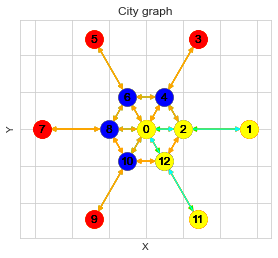

In [22]:
edl8_o = [666, 1836, 4374, 1511]
graficar(edl8_o, 'id08o')

In [23]:
calcular_frecuencias(edl8_o, evaluador)

{666: 13.100501000897898,
 1836: 13.759261534458195,
 4374: 5.8335136453815934,
 1511: 14.407146921555423}

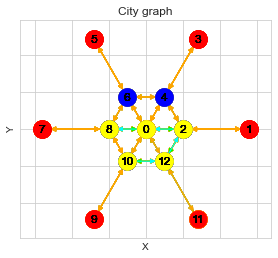

In [24]:
edl8_u =  [2430, 263, 298, 908, 333, 368, 403, 819, 438]
graficar(edl8_u, 'id08u')

In [25]:
calcular_frecuencias(edl8_u, evaluador)

{263: 13.309250536665507,
 298: 14.253951879373641,
 908: 3.247628717189567,
 333: 13.272465433081715,
 368: 13.319892138900455,
 403: 13.280534698901816,
 819: 3.5633677172297054,
 438: 14.288961771112744,
 2430: 3.3091686403878193}

## Id 9

In [6]:
# Parámetros del evaluador
L, g, P = 10, 1.8, 1
Y, a, alpha, beta = 3750, 0.8, 0.08, 0.46

evaluador = Evaluador(passenger_obj=pasajero, custom_tmode=tmode, L=L, g=g, P=P, Y=Y, a=a, alpha=alpha, beta=beta,
                      n_zonas=n_zonas)

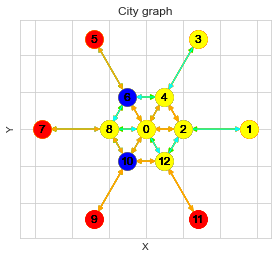

In [9]:
edl9_o = [6945, 6723, 7050, 6077, 6207]
graficar(edl9_o, 'id09o')

In [10]:
calcular_frecuencias(edl9_o, evaluador)

{6945: 7.558355459311195,
 6723: 2.442437682355266,
 7050: 6.2922081524829325,
 6077: 4.599279399768613,
 6207: 7.200705053820147}

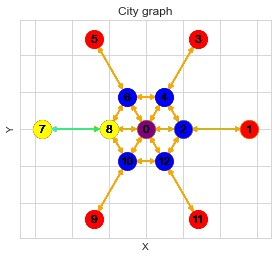

In [7]:
edl9_u = [324, 69, 1195, 300, 77, 235, 7284, 215, 985, 61]
graficar(edl9_u, 'id09u')

In [8]:
calcular_frecuencias(edl9_u, evaluador)

{324: 2.9183263981507443,
 69: 10.303266848077143,
 1195: 4.1484304764734965,
 300: 8.741521883559443,
 77: 10.294698316296111,
 235: 5.997779191552567,
 7284: 6.675453878408951,
 215: 7.295101014848936,
 985: 6.391170338843658,
 61: 10.285311939438538}

In [13]:
import matplotlib.pyplot as plt

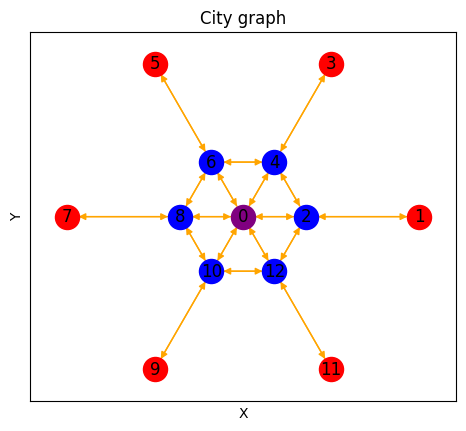

In [15]:
plt.style.use('default')
ind = Individuo(edl9_u)
ind.build_network(6, L=10, g=1.8, P=1, custom_tmode=tmode, bd=bd)
ind.graph_sidermit.plot("sidermit_city.png")